# **Loan Classification Project**

Source: The Dataset has been taken from Kaggle.
https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download

Description:

### **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
np.random.seed(42)

### **Loading Data**

In [ ]:
loan_data_train = pd.read_csv('/content/sample_data/loan_train.csv', index_col=None)
loan_data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **1. Initial Data Anlaysis**

In [ ]:
#Shape of the Dataset
print("Number of Rows in training dataset", loan_data_train.shape[0])
print("Number of Cols in training dataset", loan_data_train.shape[1])

Number of Rows in training dataset 614
Number of Cols in training dataset 13


In [ ]:
loan_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observation**

There are 8 Categorical Features namely:

'Loan_ID','Loan_Status','Gender','Married','Education', 'Dependents','Self_Employed','Property_Area'

There are 5 Continuous Features namely:

'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'

In [ ]:
loan_data_train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#Removing null values
loan_data_train.dropna(inplace=True)

#checking duplicated values
print("Duplicated values: ",loan_data_train.duplicated().sum())

#resetting the index
loan_data_train.reset_index(drop = True, inplace = True)


Duplicated values:  0


In [ ]:
loan_data_train.describe(include = ['float64', 'int'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


Checking Unique Classes in Categorical Features

In [ ]:
print(f"Unique values in Gender {loan_data_train['Gender'].unique()}")
print(f"Unique values in Married {loan_data_train['Married'].unique()}")
print(f"Unique values in Education {loan_data_train['Education'].unique()}")
print(f"Unique values in Dependents {loan_data_train['Dependents'].unique()}")
print(f"Unique values in Self_Employed {loan_data_train['Self_Employed'].unique()}")
print(f"Unique values in Property_Area {loan_data_train['Property_Area'].unique()}")

Unique values in Gender ['Male' 'Female']
Unique values in Married ['Yes' 'No']
Unique values in Education ['Graduate' 'Not Graduate']
Unique values in Dependents ['1' '0' '2' '3+']
Unique values in Self_Employed ['No' 'Yes']
Unique values in Property_Area ['Rural' 'Urban' 'Semiurban']


### **Special Treatment**

Encoding categorical features in training dataset

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Gender','Married','Education', 'Dependents','Self_Employed','Property_Area']

other_features = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(loan_data_train[categorical_features])

ecoded_loan_train = one_hot_encoder.transform(loan_data_train[categorical_features])

final_categorical_features = one_hot_encoder.get_feature_names_out(categorical_features)

# Convert to DataFrame with appropriate column names
encoded_df = pd.DataFrame(ecoded_loan_train, columns=final_categorical_features)

encoded_df.reset_index(drop=True, inplace=True)

# Combine with numeric data
loan_train_final = pd.concat([loan_data_train[other_features], encoded_df], axis=1)

loan_train_final.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001003,4583,1508.0,128.0,360.0,1.0,N,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,LP001005,3000,0.0,66.0,360.0,1.0,Y,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,LP001006,2583,2358.0,120.0,360.0,1.0,Y,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,LP001008,6000,0.0,141.0,360.0,1.0,Y,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,LP001011,5417,4196.0,267.0,360.0,1.0,Y,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Mapping the Labels in Training Set

In [ ]:
loan_train_final['Loan_Status'] = loan_train_final['Loan_Status'].map(lambda x: 1 if x == "Y" else 0 )

loan_train_final.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001003,4583,1508.0,128.0,360.0,1.0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,LP001005,3000,0.0,66.0,360.0,1.0,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,LP001006,2583,2358.0,120.0,360.0,1.0,1,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,LP001008,6000,0.0,141.0,360.0,1.0,1,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,LP001011,5417,4196.0,267.0,360.0,1.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


#### **Visualization**

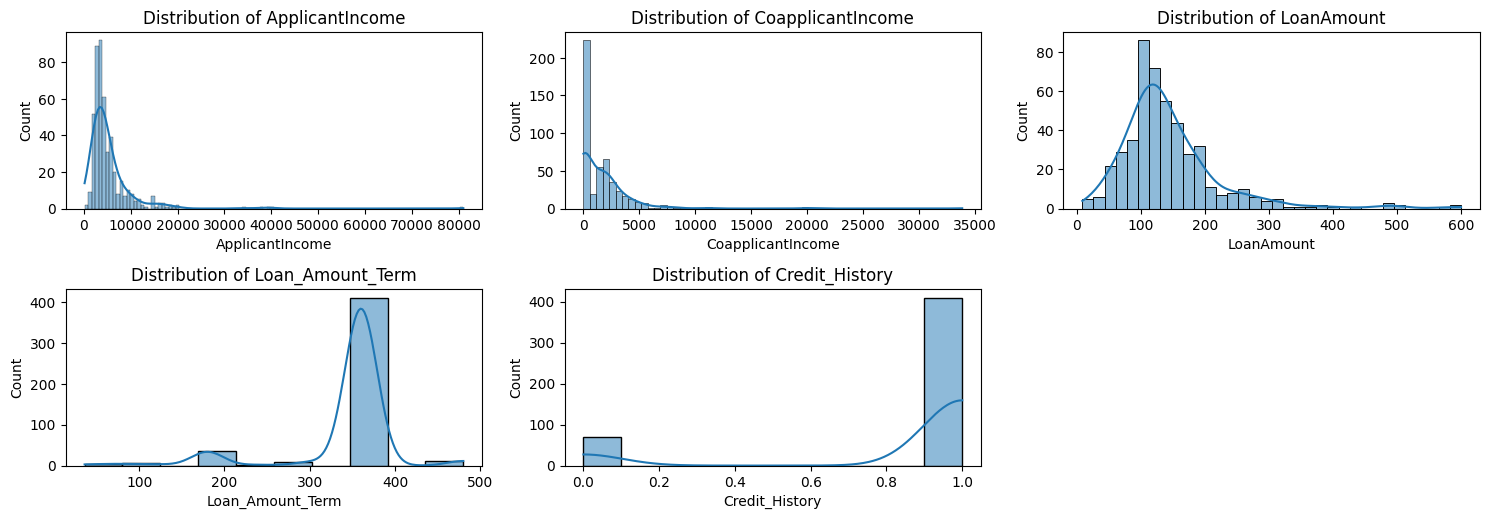

In [ ]:
def plot_hist(df, numerical_cols):

    plt.figure(figsize=(15,10))

    for idx, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, idx)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_hist(df=loan_train_final, numerical_cols = other_features[1:6])

**Inference**

There are not many outliers but we can still run a statistical test and handle the outliers

#### **Special Treatment: Outlier detection and Handling Using Z-score**

In [ ]:
#Keeping one copy of original datasets
original_df = loan_train_final.copy()

def detect_outliers(df, column):

    df[f'z_score_{column}'] = (df[column] - df[column].mean()) / df[column].std()

    outliers_before =  df[(df[f'z_score_{column}'] > 3) | (df[f'z_score_{column}'] < -3)]

    print(f"Number of outliers in {column}: ",len(outliers_before))

    df[column] = df[df[f'z_score_{column}'].abs() < 3][column]

for col in other_features[1:6]:
    detect_outliers(df=loan_train_final, column=col)

Number of outliers in ApplicantIncome:  5
Number of outliers in CoapplicantIncome:  5
Number of outliers in LoanAmount:  10
Number of outliers in Loan_Amount_Term:  10
Number of outliers in Credit_History:  0


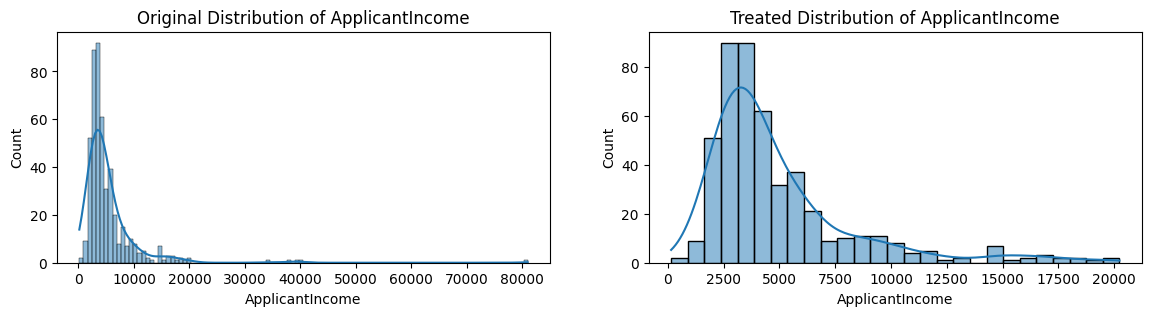

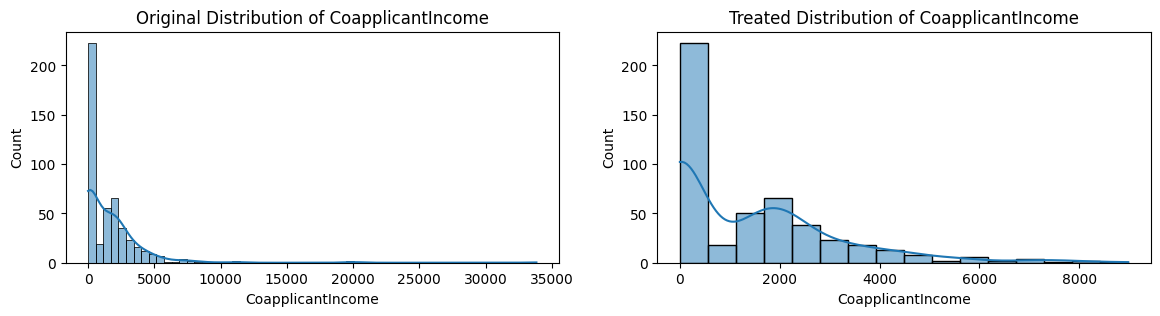

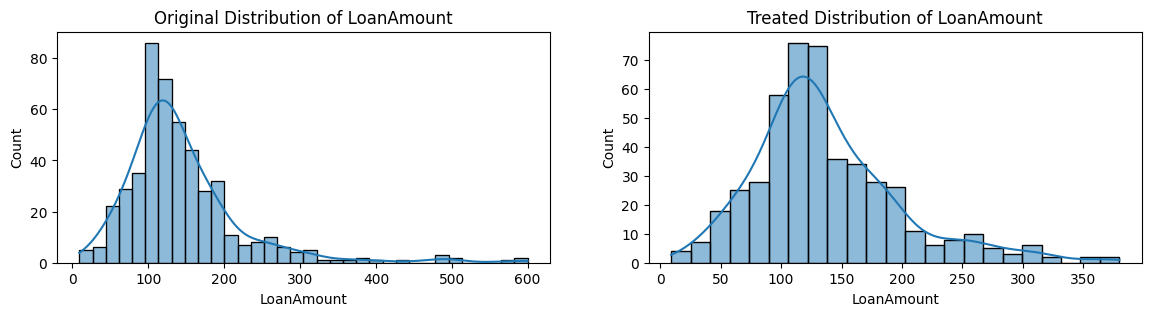

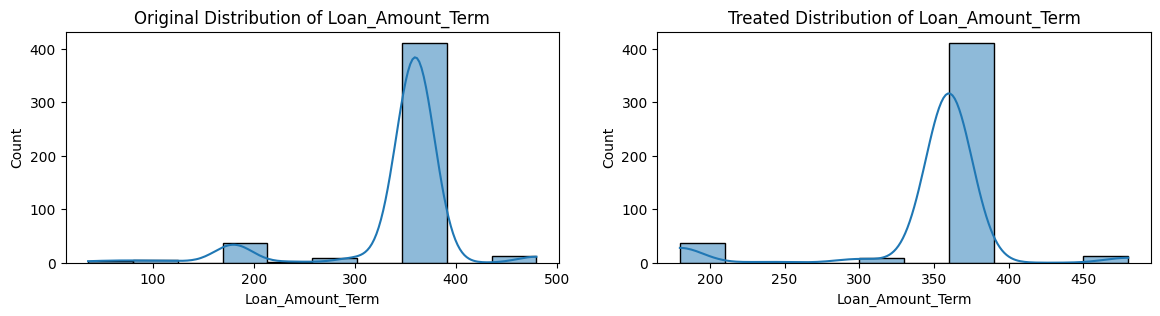

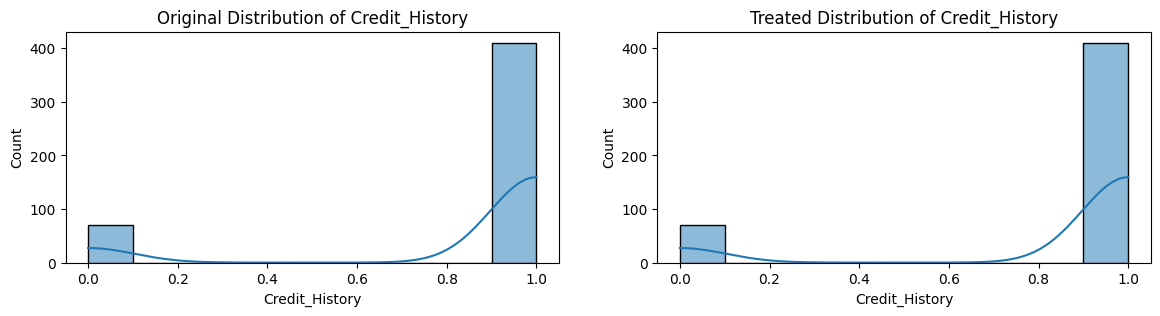

In [ ]:
# Outlier Handling
def compare_distributions(original_df, df_handled, column):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))
        # Original distribution
        sns.histplot(data=original_df, x=column, kde=True, ax=ax1)
        ax1.set_title(f'Original Distribution of {column}')

        # Treated distribution
        sns.histplot(data=df_handled, x=column, kde=True, ax=ax2)
        ax2.set_title(f'Treated Distribution of {column}')

        plt.show()

for col in other_features[1:6]:
    compare_distributions(original_df, loan_train_final, col)

In [ ]:
#checking null values after handling outliers
loan_train_final.isnull().sum()

,0
Loan_ID,0
ApplicantIncome,5
CoapplicantIncome,5
LoanAmount,10
Loan_Amount_Term,10
Credit_History,0
Loan_Status,0
Gender_Female,0
Gender_Male,0
Married_No,0


In [ ]:
#dropping z score columns and null values
loan_train_final.dropna(inplace=True)

loan_train_final.reset_index(drop = True, inplace = True)

# Dropping extra columns of z-score
loan_train_final.drop(columns= loan_train_final.columns[22:], inplace = True, axis=1)

loan_train_final.shape

(452, 22)

**Inference**

After removing outliers and null values, we are left with a total of 452 observations for training.

### **2. Data Correlation**

#### **Correlation between data attributes**

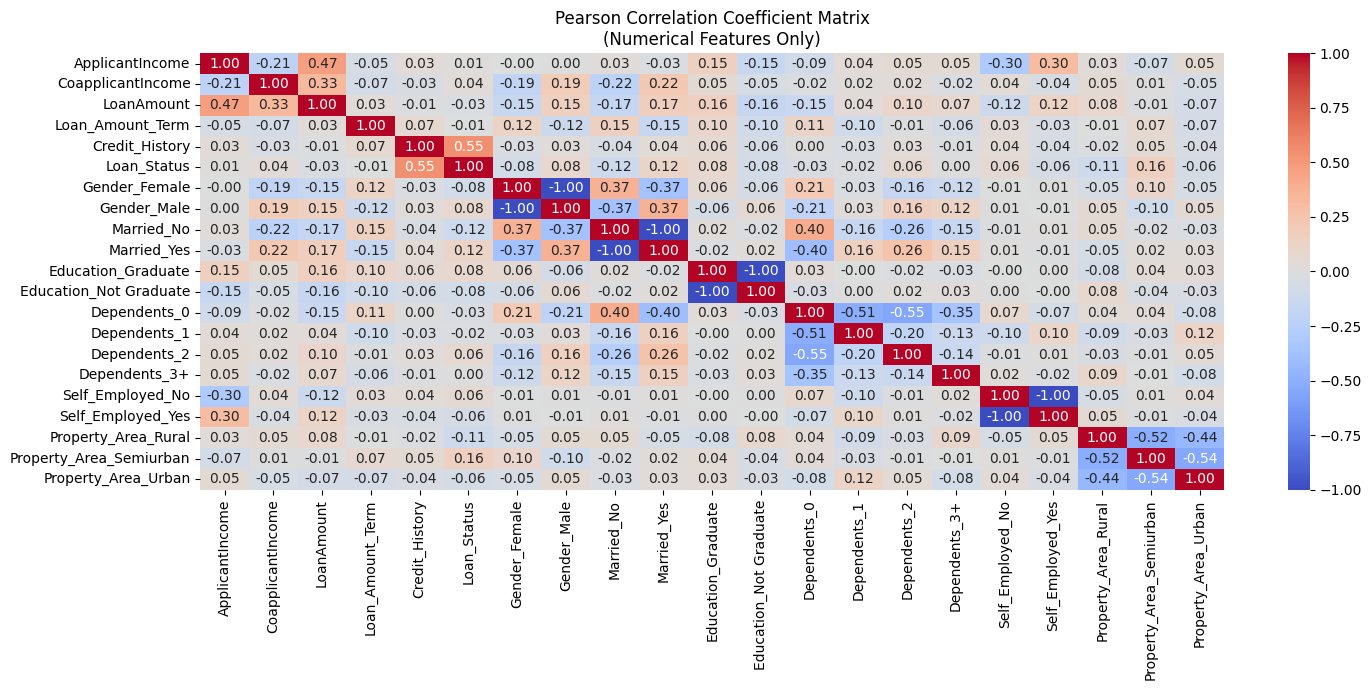

In [ ]:
# Calculate the correlation matrix
corr_matrix = loan_train_final.iloc[:,1:].corr()

plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap = 'coolwarm')
plt.title('Pearson Correlation Coefficient Matrix\n(Numerical Features Only)')
plt.tight_layout()
plt.show()

#### **Correlation Between Attributes: Scatter Plot**

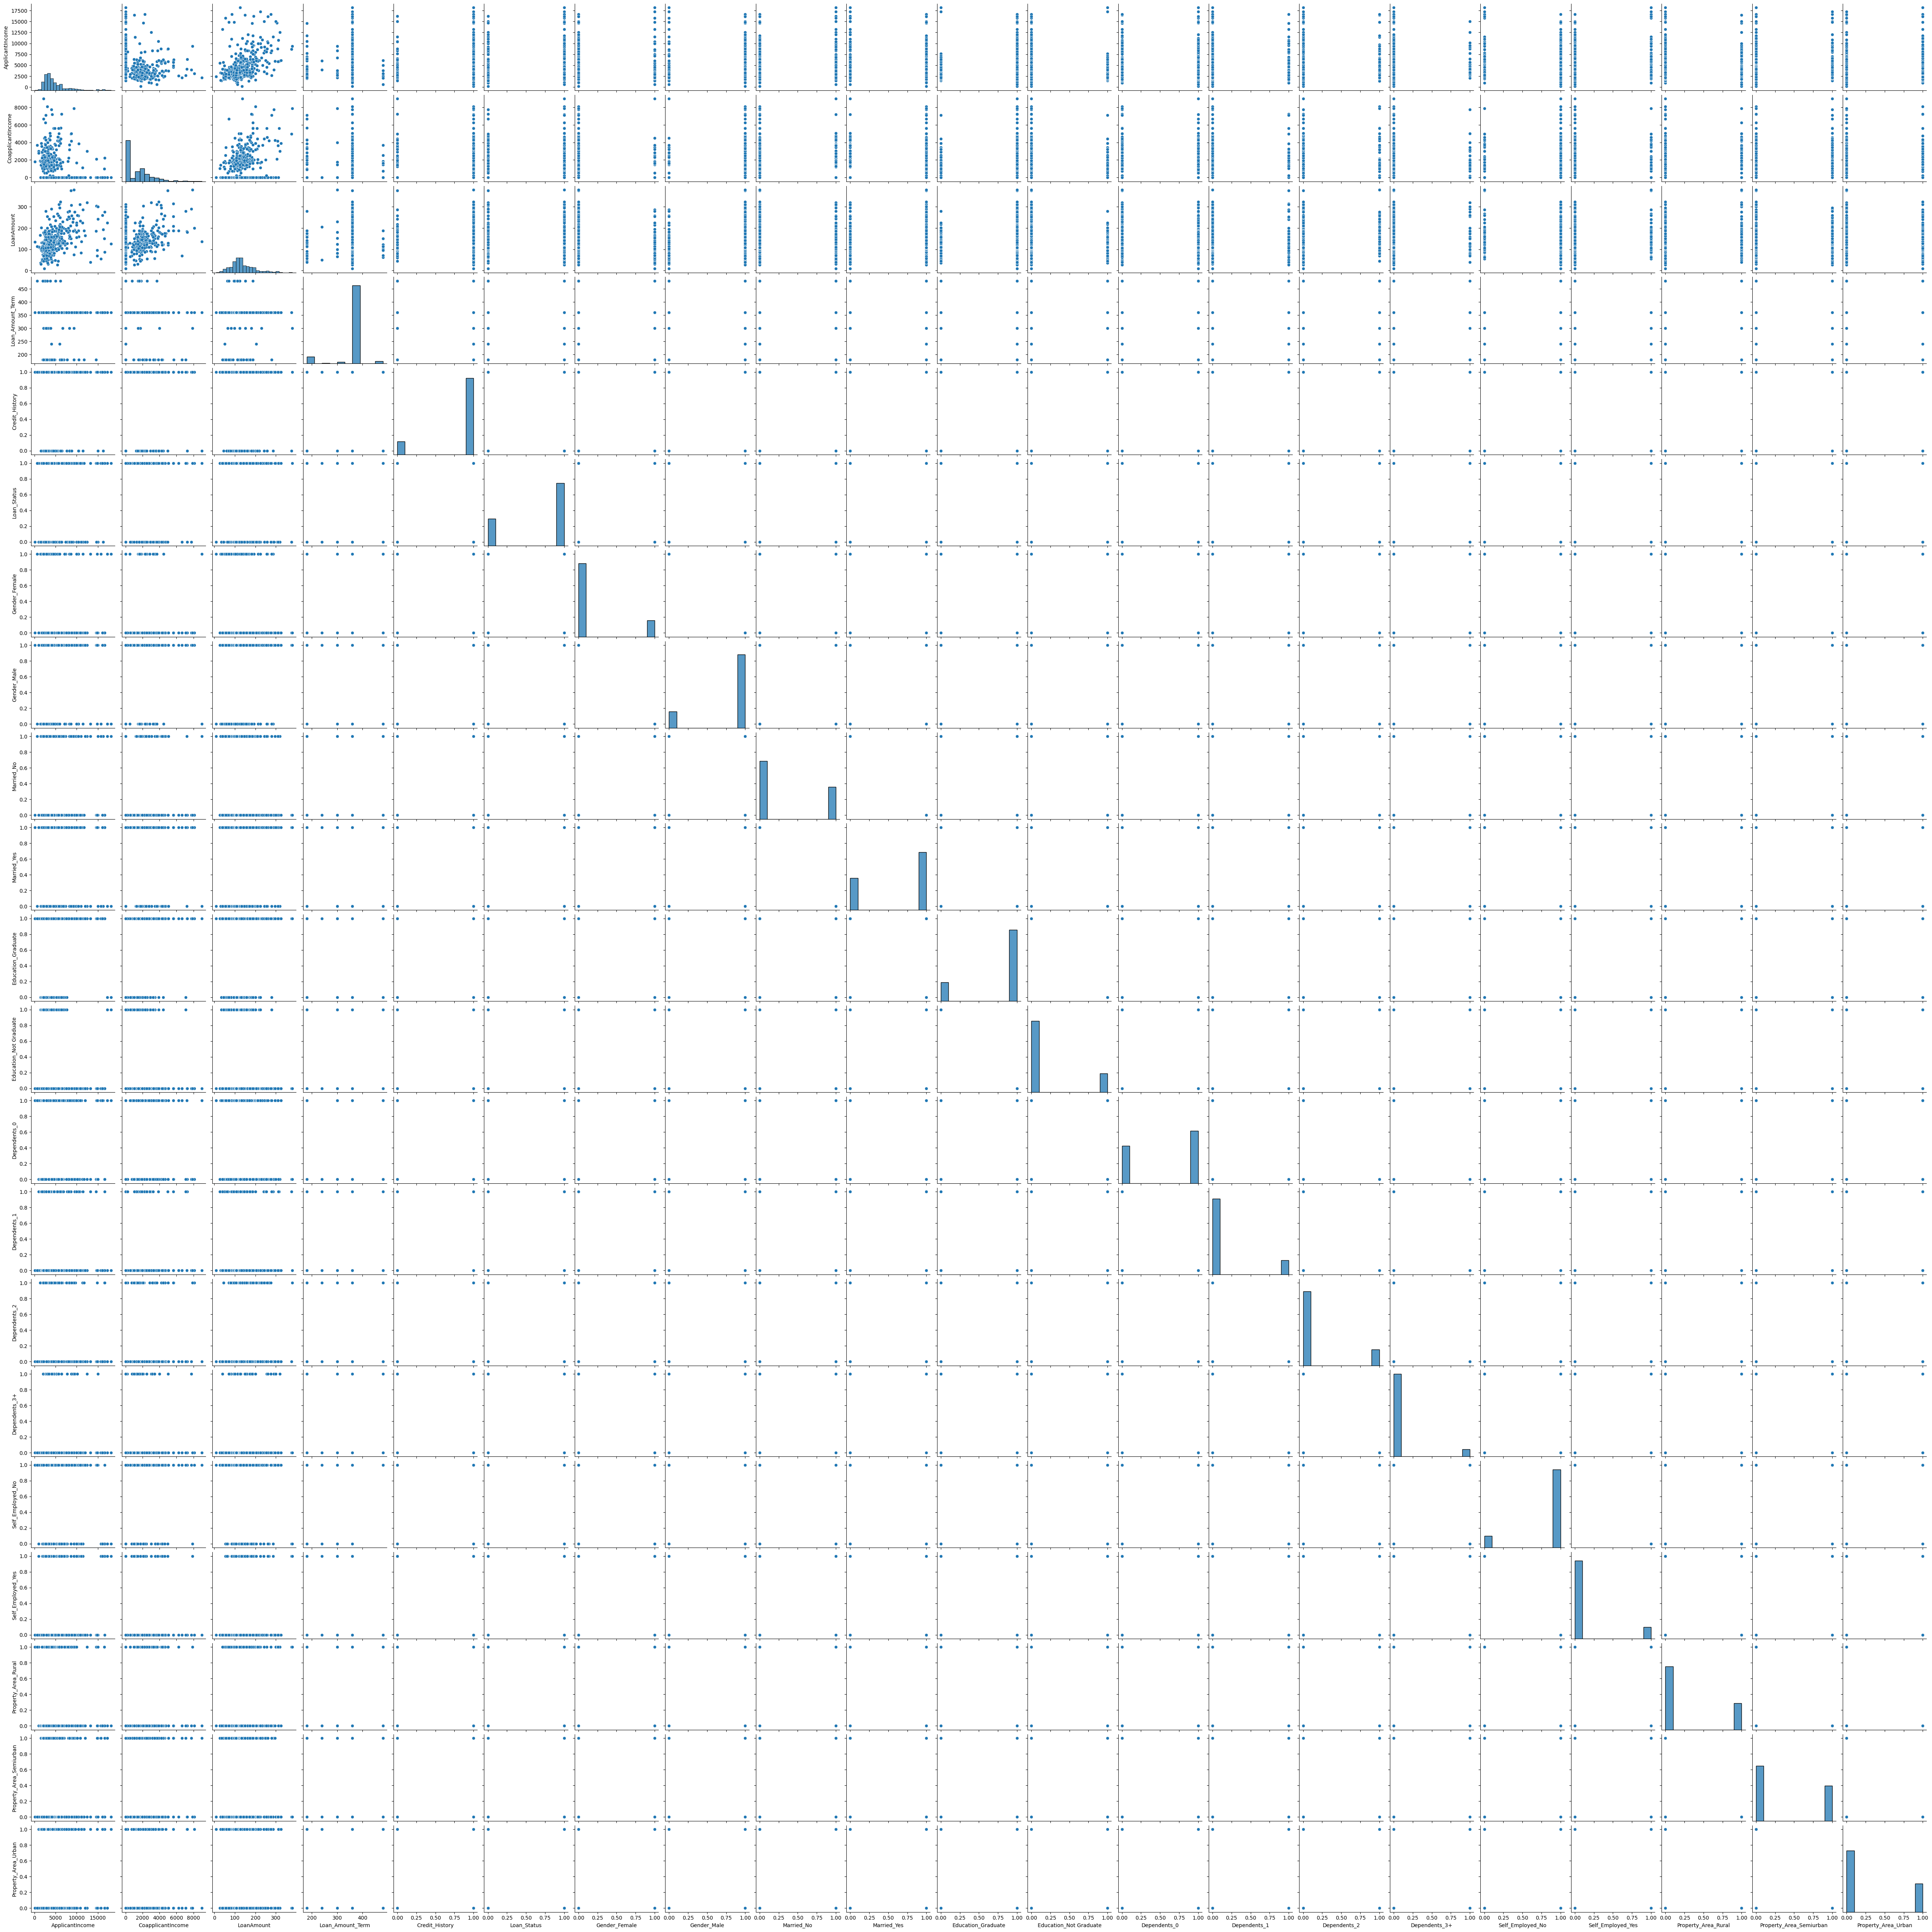

In [ ]:
sns.pairplot(loan_train_final)

plt.show()

### **3. Creating Training, Validation and Test Dataset**

In [ ]:
#using train test split to split the dataset

from sklearn.model_selection import train_test_split

X = loan_train_final.loc[:, ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', 'Gender_Female',
 'Gender_Male','Married_No','Married_Yes','Education_Graduate','Education_Not Graduate','Dependents_0','Dependents_1','Dependents_2','Dependents_3+',
 'Self_Employed_No','Self_Employed_Yes','Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban']]

y = loan_train_final.loc[:,'Loan_Status']

#Splitting into training, validation together and test separate (20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Now spliting the train_val set into training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, {Y_train.shape}")
print(f"Validation set size: {X_val.shape}, {Y_val.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")


Training set size: (288, 20), (288,)
Validation set size: (73, 20), (73,)
Test set size: (91, 20), (91,)


### Verification of splitting

In [ ]:
# Checking the number of classes in all 3 sets
print(f"Number of classes in training set: {Y_train.value_counts()}")

print(f"Number of classes in validation set: {Y_val.value_counts()}")

print(f"Number of classes in test set: {y_test.value_counts()}")

Number of classes in training set: Loan_Status
1    203
0     85
Name: count, dtype: int64
Number of classes in validation set: Loan_Status
1    48
0    25
Name: count, dtype: int64
Number of classes in test set: Loan_Status
1    65
0    26
Name: count, dtype: int64


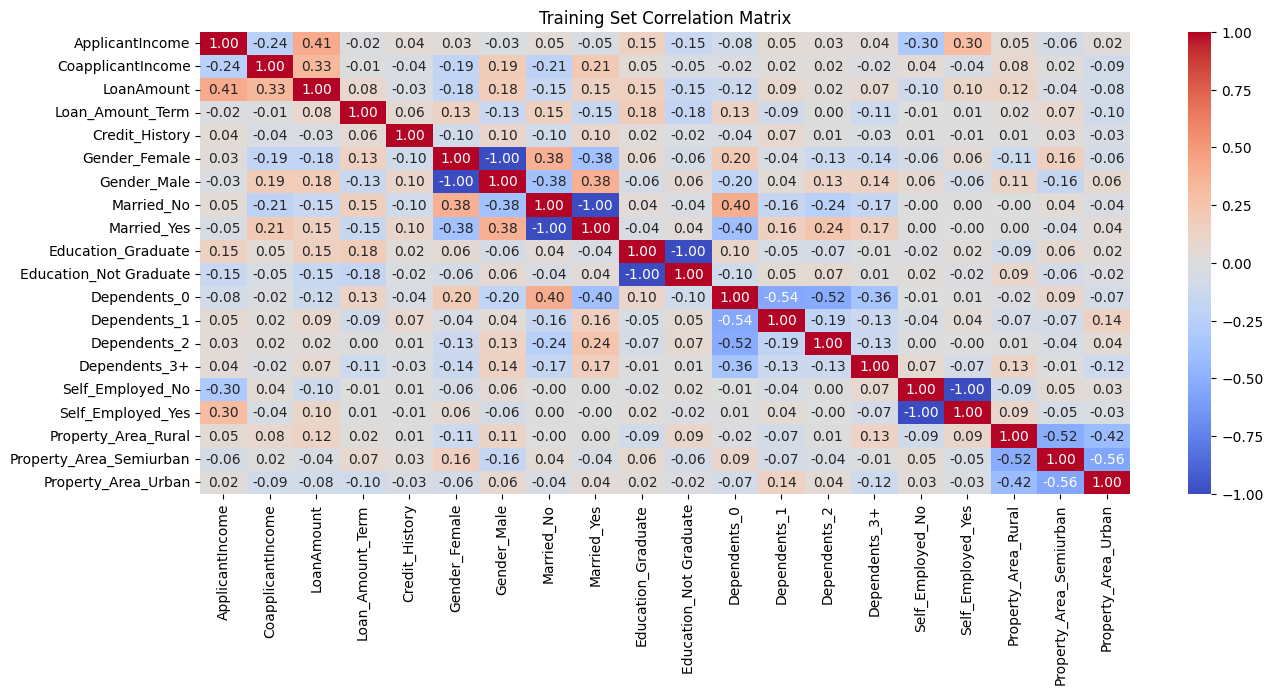

In [ ]:
corr_train = X_train.corr()
corr_test = X_test.corr()
corr_val = X_val.corr()

# Plotting the correlation matrix for the training set
plt.figure(figsize=(15, 6))
sns.heatmap(corr_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Training Set Correlation Matrix")
plt.show()

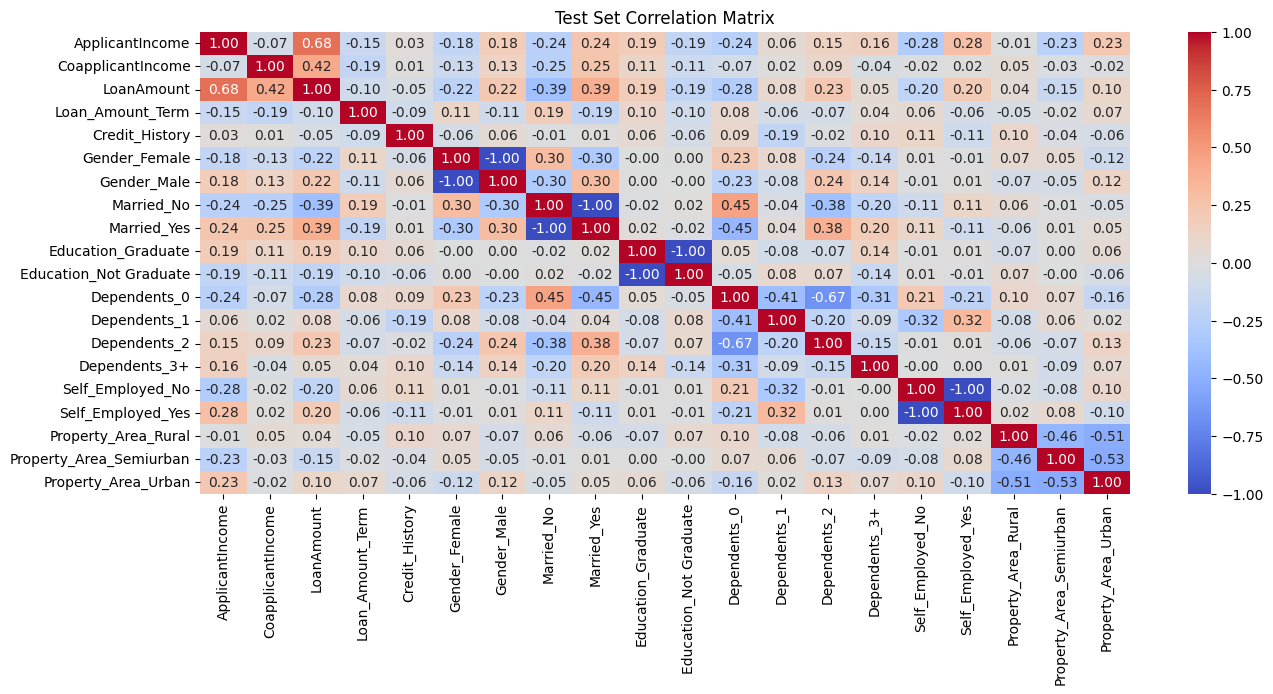

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(corr_test, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Test Set Correlation Matrix")
plt.show()

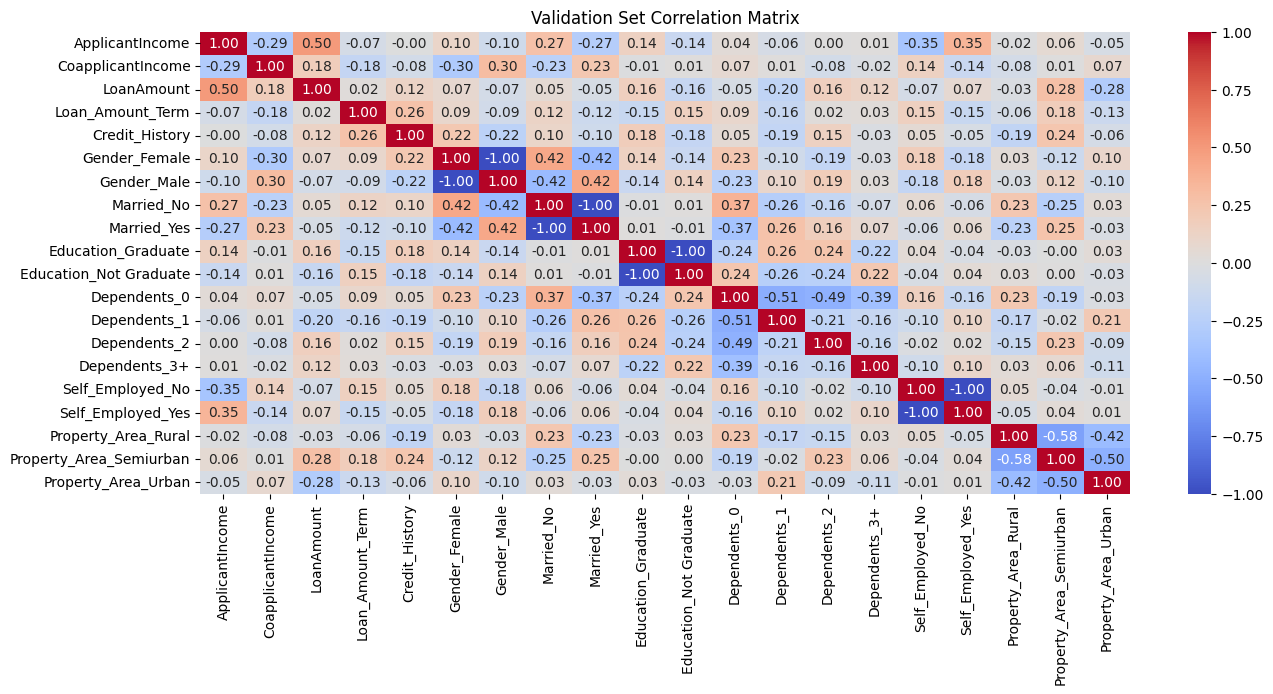

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(corr_val, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Validation Set Correlation Matrix")
plt.show()

### Observation:

We can observe that  the correlation b/w each features in all 3 sets aare quite similar to each other, thus our splitting is significant

Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### **4. Training different Classifiers**

#### **Multinomial Logistic Regression (Softmax Regression)**

In [ ]:
# Training a simple Model
softmax_reg = LogisticRegression(C= 200, random_state=42, solver= 'newton-cg', max_iter = 100)
softmax_reg.fit(X_train_scaled, Y_train)

# Predicting
y_pred_val = softmax_reg.predict(X_val_scaled)

# Accuracy Score
accuracy_softmax = accuracy_score(y_pred= y_pred_val, y_true= Y_val)
print("Accuracy Score for Softmax Regression or Multinomial Logistic Regression is", accuracy_softmax)

Accuracy Score for Softmax Regression or Multinomial Logistic Regression is 0.8493150684931506


 **Grid Search CV - Hyperparameter Tuning C, solver, max number of iterations**

In [ ]:
param_grid_softmax = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear', 'newton-cholesky'],
    'max_iter': [50, 100, 200, 300]
}

np.random.seed(42)

random_search_softmax = RandomizedSearchCV(estimator=LogisticRegression(random_state=42), param_distributions=param_grid_softmax,
                                   n_iter=300, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring = 'accuracy')

random_search_softmax.fit(X_train_scaled, Y_train)

print("Best parameters found: ", random_search_softmax.best_params_)

y_pred_val = random_search_softmax.predict(X_val_scaled)

accuracy_grid_soft = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for Softmax Regression", accuracy_grid_soft)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best parameters found:  {'solver': 'newton-cg', 'max_iter': 50, 'C': 0.1}
Accuracy Score for Softmax Regression 0.8493150684931506


**Impact of Hyperparameters**

1. Regularization Strength (C):

  The C parameter controls regularization; smaller values increase regularization, helping to prevent overfitting. The optimal value found was 0.1, indicating a balance between regularization and fitting the training data.
  Solver:

  The choice of solver affects how efficiently the model converges. The selected newton-cg solver was effective for this dataset, indicating it handled the multiclass nature of softmax regression well.
  Maximum Iterations (max_iter):

  The max_iter parameter sets the maximum number of iterations for convergence. A value of 50 was sufficient for the chosen solver, ensuring effective training without unnecessary computations.


2. After performing Randomized search we couldn't find a higher accuracy than 84%.

3. Thus the final selected hyperparameters are: C= 200, 'solver'= 'newton-cg', 'max_iter': 100

In [ ]:
def evaluate_model(results, algorithm, y_pred_train, y_pred_val, y_pred_test):
  results = pd.concat([results, pd.DataFrame([{
            "algorithm": algorithm,
            "dataset": "Train",
            "Accuracy": accuracy_score(y_true= Y_train, y_pred = y_pred_train),
            "Precision": precision_score(y_true= Y_train, y_pred = y_pred_train, average = "macro"),
            "Recall": recall_score(y_true= Y_train, y_pred = y_pred_train, average = "macro"),
            "F1- score": f1_score(y_true= Y_train, y_pred = y_pred_train, average = "macro")}])], ignore_index=True )

  results = pd.concat([results, pd.DataFrame([{
              "algorithm": algorithm,
              "dataset": "Validation",
              "Accuracy": accuracy_score(y_true= Y_val, y_pred = y_pred_val),
              "Precision": precision_score(y_true= Y_val, y_pred = y_pred_val, average = "macro"),
              "Recall": recall_score(y_true= Y_val, y_pred = y_pred_val, average = "macro"),
              "F1- score": f1_score(y_true= Y_val, y_pred = y_pred_val, average = "macro")}])], ignore_index=True )

  results = pd.concat([results, pd.DataFrame([{
              "algorithm": algorithm,
              "dataset": "Test",
              "Accuracy": accuracy_score(y_true= y_test, y_pred = y_pred_test),
              "Precision": precision_score(y_true= y_test, y_pred = y_pred_test, average = "macro"),
              "Recall": recall_score(y_true= y_test, y_pred = y_pred_test, average = "macro"),
              "F1- score": f1_score(y_true= y_test, y_pred = y_pred_test, average = "macro")}])], ignore_index=True )

  return results

**Evaluation on Validation and test set**

In [ ]:
results = pd.DataFrame()

# Using the best parameters from Grid Search CV and training model
softmax_reg_model = LogisticRegression(C= 0.1, max_iter= 50, solver= 'newton-cg', random_state = 42)

softmax_reg_model.fit(X_train_scaled, Y_train)

y_pred_val = softmax_reg_model.predict(X_val_scaled)

y_pred_train = softmax_reg_model.predict(X_train_scaled)

y_pred_test = softmax_reg_model.predict(X_test_scaled)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, y_pred_test=y_pred_test, algorithm = 'Softmax Regression')

results.head()

,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.819444,0.845942,0.711214,0.738839
1,Softmax Regression,Validation,0.849315,0.862626,0.799167,0.818695
2,Softmax Regression,Test,0.802198,0.815401,0.676923,0.700658


### Performance measure

In [ ]:
#function for confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, dataset_name):
  cm = confusion_matrix(y_true=y_true, y_pred= y_pred)

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['NO', 'YES'],
              yticklabels=[ 'NO', 'YES'])
  plt.title(f'Confusion Matrix {model_name} ({dataset_name} Set)')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

**Confusion Matrix on Validation Set**

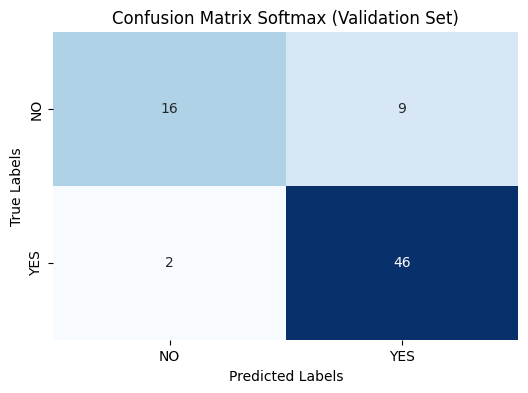

In [ ]:
plot_confusion_matrix(y_true=Y_val, y_pred= y_pred_val, model_name="Softmax", dataset_name="Validation")

**Inference From Softmax Regression Model**

1. Correctly Classified Yes of approved loan  = 46
2. Correctly Classified No to loans = 16
3. Precision = 86% and Recall = 80%
4. Accuracy achieved by Softmax Regression model is 85%
5. Both accuracy and precision are higher.

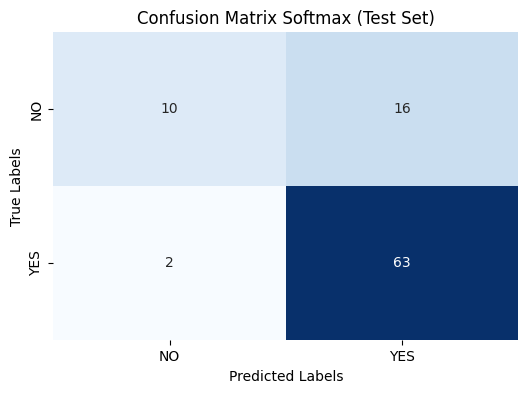

In [ ]:
plot_confusion_matrix(y_true=y_test, y_pred= y_pred_test, model_name="Softmax", dataset_name="Test")

**Inference From Softmax Regression Model**

1. Correctly Classified Yes of approved loan  = 63
2. Correctly Classified No to loans = 10
3. Precision = 81% and Recall = 67%
4. Accuracy achieved by Softmax Regression model is 80%

 #### **Support Vector Machine**

In [ ]:
#Model Intialization
svm_clf = SVC(kernel="poly", degree= 2, gamma = 'scale', C= 10,  random_state=42, probability=True)

#Training
svm_clf.fit(X_train_scaled, Y_train)

# Predicting
y_pred_val = svm_clf.predict(X_val_scaled)

# Accuracy Score
accuracy_svm = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for SVM is", accuracy_svm)


Accuracy Score for SVM is 0.8082191780821918


**Grid Search CV - Hyperparameter Tuning:  C, kernel, degree of polynomial kernel, gamma**

In [ ]:
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
    'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

np.random.seed(42)

random_search_svc = RandomizedSearchCV(estimator=SVC(random_state = 42), param_distributions= param_grid_svm,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring = 'accuracy')

random_search_svc.fit(X_train_scaled, Y_train)

print("Best Parameters: ", random_search_svc.best_params_)

y_pred_val = random_search_svc.predict(X_val_scaled)

accuracy_grid_svm = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for SVM Classification GridCV", accuracy_grid_svm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'C': 10}
Accuracy Score for SVM Classification GridCV 0.8493150684931506


 **Impact of Hyperparameters**  

1. Regularization Parameter (C):

  The C parameter controls the trade-off between achieving a low training error and a low testing error. A higher C value allows the model to fit the training data more closely, which can lead to overfitting. In this case, a value of 10 was chosen, indicating a preference for a model that fits well while still generalizing to unseen data.
  Kernel Type:

  The kernel function transforms the input data into a higher-dimensional space to make it easier to classify. Different kernels can capture different patterns in the data. The best choice was found to be linear, suggesting that the data may have a linear relationship that the model can exploit effectively. This choice improved the model's accuracy significantly compared to the initial polynomial kernel.
  Gamma:

  The gamma parameter defines how far the influence of a single training example reaches. A lower gamma means a wider reach, while a higher gamma results in a more localized influence. The selected auto value allows the model to determine the appropriate level of influence based on the number of features, contributing to improved model performance.
  Degree:

  The degree parameter is relevant when using polynomial kernels and controls the flexibility of the decision boundary. In this instance, a degree of 4 was chosen, but the linear kernel rendered it less impactful. However, this flexibility could help in cases where a polynomial kernel is preferred.

3. Selected Hyperparameters are 'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'C': 10

3. With these hyperparameters the accuracy is 85%

 **Evaluation on Validation and test set**

In [ ]:
#Predicting
svm_clf_model = SVC(kernel = 'linear', gamma = 'auto', degree = 4, C = 10)

svm_clf_model.fit(X_train_scaled, Y_train)

y_pred_val = svm_clf_model.predict(X_val_scaled)

y_pred_train = svm_clf_model.predict(X_train_scaled)

y_pred_test = svm_clf_model.predict(X_test_scaled)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, y_pred_test=y_pred_test, algorithm = 'SVC')

results


,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.819444,0.845942,0.711214,0.738839
1,Softmax Regression,Validation,0.849315,0.862626,0.799167,0.818695
2,Softmax Regression,Test,0.802198,0.815401,0.676923,0.700658
3,SVC,Train,0.815972,0.851210,0.701912,0.729242
4,SVC,Validation,0.849315,0.881031,0.789583,0.813473
5,SVC,Test,0.813187,0.854545,0.684615,0.711650


### Performance measure

**Confusion Matrix on Validation Set**

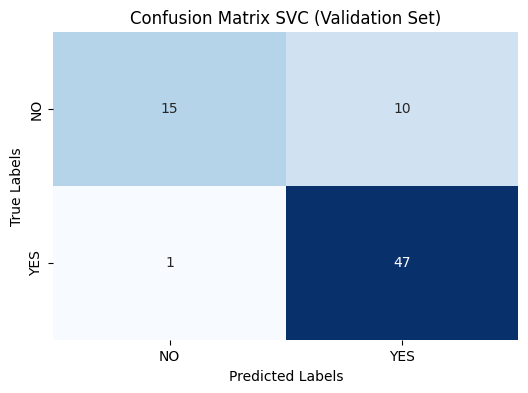

In [ ]:
plot_confusion_matrix(y_true=Y_val, y_pred= y_pred_val, model_name="SVC", dataset_name="Validation")

**Inference From Support Vector Classification Model**

1. Correctly Classified Yes of approved loan  = 47
2. Correctly Classified No to loans = 15
4. Precision = 88% and Recall = 78%
3. Accuracy achieved by SVC model is 85%
4. Accuracy is same as the Softmax regression model, precision is higher

**Confusion Matrix on Test Set**

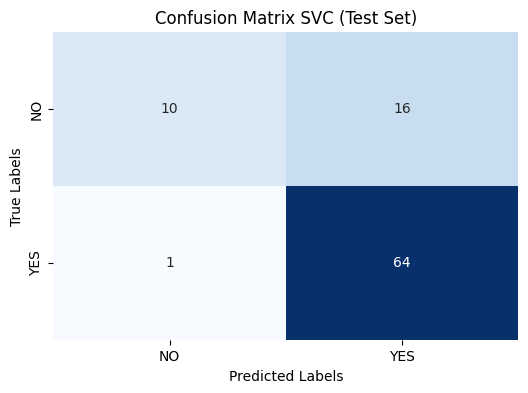

In [ ]:
plot_confusion_matrix(y_true=y_test, y_pred= y_pred_test, model_name="SVC", dataset_name="Test")

**Inference From Support Vector Classification Model**

1. Correctly Classified Yes of approved loan  = 64
2. Correctly Classified No to loans = 10
4. Precision = 85% and Recall = 68%
3. Accuracy achieved by SVC model is 81%

#### **Random Forest classifier**

In [ ]:
#Model Initialization
rnd_clf = RandomForestClassifier(max_depth = 5, n_estimators = 50, min_samples_split= 5, min_samples_leaf = 2 ,random_state=42)

#Training
rnd_clf.fit(X_train_scaled, Y_train)

# Predicting
y_pred_val = rnd_clf.predict(X_val_scaled)

# Accuracy Score
accuracy_rnd = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for Random Forest Classifier is", accuracy_rnd)
print("Feature importance in the Random Forest \n", rnd_clf.feature_importances_)
print("Feature Names in the Random Forest \n", rnd_clf.feature_names_in_)

Accuracy Score for Random Forest Classifier is 0.8356164383561644
Feature importance in the Random Forest 
 [0.15002375 0.06083894 0.15913902 0.02407322 0.37354468 0.02442164
 0.01811368 0.03283905 0.02133906 0.01009322 0.01216028 0.00817531
 0.01460127 0.00869398 0.0069902  0.00348379 0.01185264 0.01956932
 0.02190613 0.01814082]
Feature Names in the Random Forest 
 ['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Gender_Female' 'Gender_Male' 'Married_No' 'Married_Yes'
 'Education_Graduate' 'Education_Not Graduate' 'Dependents_0'
 'Dependents_1' 'Dependents_2' 'Dependents_3+' 'Self_Employed_No'
 'Self_Employed_Yes' 'Property_Area_Rural' 'Property_Area_Semiurban'
 'Property_Area_Urban']


**Grid Search CV - Hyperparameter Tuning:  the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node**

In [ ]:
param_grid_rnd = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

random_search_rnd = RandomizedSearchCV(estimator= RandomForestClassifier(random_state=42), param_distributions= param_grid_rnd,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring = 'accuracy')

random_search_rnd.fit(X_train_scaled, Y_train)

print("Best Parameters: ", random_search_rnd.best_params_)

y_pred_val = random_search_rnd.predict(X_val_scaled)

accuracy_grid_rnd = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for Random Classification GridCV", accuracy_grid_rnd)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Accuracy Score for Random Classification GridCV 0.821917808219178


**Impact of Hyperparameters**

1. Number of Trees (n_estimators): The n_estimators parameter specifies the number of trees in the forest. A higher number of trees generally leads to better performance because it allows for more robust averaging of predictions, which helps to reduce overfitting. In the optimized model, a suitable number was chosen from the range provided, balancing computational efficiency and predictive performance.

  Maximum Depth (max_depth):

  The max_depth parameter limits the depth of each tree in the forest. A shallow depth (such as 5) can prevent overfitting by ensuring that trees do not become too complex. However, it may also limit the model's ability to capture intricate patterns. In this case, the chosen max depth was effective in maintaining a good accuracy score of 83.56%, indicating an appropriate balance between model complexity and generalization.
  Minimum Samples for Splitting (min_samples_split):

  This parameter sets the minimum number of samples required to split an internal node. A higher value (like 5) can create more generalized trees by preventing splits based on very few samples, thereby avoiding overfitting. This choice likely contributed to the model's stability and improved performance on unseen data.
  
  Minimum Samples per Leaf (min_samples_leaf):

  The min_samples_leaf parameter specifies the minimum number of samples that must be present in a leaf node. Setting this parameter to a value like 2 helps ensure that each leaf contains a reasonable number of samples, which can lead to more reliable predictions and improved generalization.

2. We could not find a much more better parameters than one we manually tried thus the final parameters for our model are:
max_depth = 5, n_estimators = 50, min_samples_split= 5, min_samples_leaf = 2 ,random_state=42

**Evaluation on Validation set**

In [ ]:
y_pred_val = rnd_clf.predict(X_val_scaled)

y_pred_train = rnd_clf.predict(X_train_scaled)

y_pred_test = rnd_clf.predict(X_test_scaled)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, y_pred_test=y_pred_test, algorithm = 'Random Forest')

results


,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.819444,0.845942,0.711214,0.738839
1,Softmax Regression,Validation,0.849315,0.862626,0.799167,0.818695
2,Softmax Regression,Test,0.802198,0.815401,0.676923,0.700658
3,SVC,Train,0.815972,0.851210,0.701912,0.729242
4,SVC,Validation,0.849315,0.881031,0.789583,0.813473
5,SVC,Test,0.813187,0.854545,0.684615,0.711650
6,Random Forest,Train,0.836806,0.867679,0.737207,0.767802
7,Random Forest,Validation,0.835616,0.851891,0.779167,0.799451
8,Random Forest,Test,0.791209,0.782051,0.669231,0.689977


### Performance Measure

**Confusion Matrix on Validation Set**


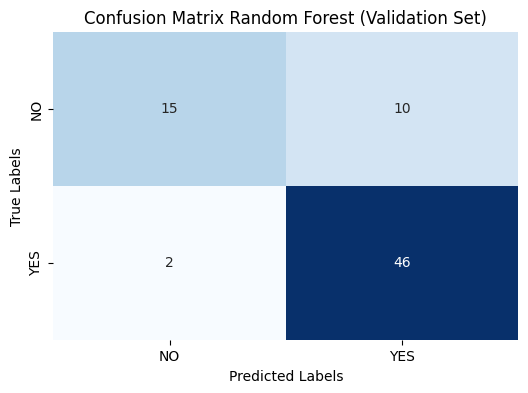

In [ ]:
plot_confusion_matrix(y_true=Y_val, y_pred= y_pred_val, model_name="Random Forest", dataset_name="Validation")

**Inference From Random Forest Classification Model**

1. Correctly Classified Yes of approved loan  = 46
2. Correctly Classified No to loans = 15
4. Precision = 85% and Recall = 78%
3. Accuracy achieved by Softmax Regression model is 83%
4. Accuracy is lower than the previous two models but the precision is same

**Confusion Matrix on Test Set**


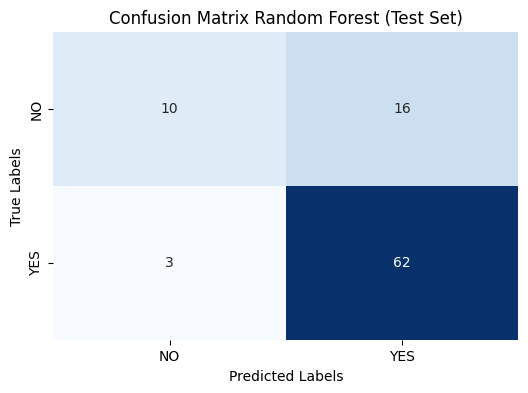

In [ ]:
plot_confusion_matrix(y_true=y_test, y_pred= y_pred_test, model_name="Random Forest", dataset_name="Test")

**Inference From Random Forest Classification Model**

1. Correctly Classified Yes of approved loan  = 62
2. Correctly Classified No to loans = 10
4. Precision = 78% and Recall = 66%
3. Accuracy achieved by Softmax Regression model is 79%

### **5. Ensemble Model**

#### **Voting Classfier - Hard Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier

#Using the three generated best models based on hyperparameter tuning
hard_voting_clf = VotingClassifier(estimators=[
    ('svc', svm_clf_model),
    ('rf', rnd_clf),
    ('softmax', softmax_reg_model)
], voting='hard', weights=[1, 1, 1])

# Training
hard_voting_clf.fit(X_train_scaled, Y_train)

# Predicting
y_pred_val = hard_voting_clf.predict(X_val_scaled)

y_pred_train = hard_voting_clf.predict(X_train_scaled)

y_pred_test = hard_voting_clf.predict(X_test_scaled)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, y_pred_test=y_pred_test, algorithm = 'Hard Voting Classifier')

results

,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.819444,0.845942,0.711214,0.738839
1,Softmax Regression,Validation,0.849315,0.862626,0.799167,0.818695
2,Softmax Regression,Test,0.802198,0.815401,0.676923,0.700658
3,SVC,Train,0.815972,0.851210,0.701912,0.729242
4,SVC,Validation,0.849315,0.881031,0.789583,0.813473
5,SVC,Test,0.813187,0.854545,0.684615,0.711650
6,Random Forest,Train,0.836806,0.867679,0.737207,0.767802
7,Random Forest,Validation,0.835616,0.851891,0.779167,0.799451
8,Random Forest,Test,0.791209,0.782051,0.669231,0.689977
9,Hard Voting Classifier,Train,0.822917,0.856852,0.713677,0.742420


#### **Voting Classifier: Soft Voting**

In [ ]:
soft_voting_clf = VotingClassifier(estimators=[
    ('svc', svm_clf_model),
    ('rf', rnd_clf),
    ('softmax', softmax_reg_model)
], voting='soft')

# setting probabilty true for svc
soft_voting_clf.named_estimators["svc"].probability = True

soft_voting_clf.fit(X_train_scaled, Y_train)

# Predicting
y_pred_val = soft_voting_clf.predict(X_val_scaled)

y_pred_train = soft_voting_clf.predict(X_train_scaled)

y_pred_test = soft_voting_clf.predict(X_test_scaled)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, y_pred_test=y_pred_test, algorithm = 'Soft Voting Classifier')

results



,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.819444,0.845942,0.711214,0.738839
1,Softmax Regression,Validation,0.849315,0.862626,0.799167,0.818695
2,Softmax Regression,Test,0.802198,0.815401,0.676923,0.700658
3,SVC,Train,0.815972,0.851210,0.701912,0.729242
4,SVC,Validation,0.849315,0.881031,0.789583,0.813473
5,SVC,Test,0.813187,0.854545,0.684615,0.711650
6,Random Forest,Train,0.836806,0.867679,0.737207,0.767802
7,Random Forest,Validation,0.835616,0.851891,0.779167,0.799451
8,Random Forest,Test,0.791209,0.782051,0.669231,0.689977
9,Hard Voting Classifier,Train,0.822917,0.856852,0.713677,0.742420


#### **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('svc', svm_clf_model),
        ('rf', rnd_clf),
        ('softmax', softmax_reg_model)
    ],
    final_estimator=LogisticRegression(random_state=42))

stacking_clf.fit(X_train_scaled, Y_train)

# Predicting
y_pred_val = stacking_clf.predict(X_val_scaled)

y_pred_train = stacking_clf.predict(X_train_scaled)

y_pred_test = stacking_clf.predict(X_test_scaled)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, y_pred_test=y_pred_test, algorithm = 'Stacking Classifier')
results


,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.819444,0.845942,0.711214,0.738839
1,Softmax Regression,Validation,0.849315,0.862626,0.799167,0.818695
2,Softmax Regression,Test,0.802198,0.815401,0.676923,0.700658
3,SVC,Train,0.815972,0.851210,0.701912,0.729242
4,SVC,Validation,0.849315,0.881031,0.789583,0.813473
5,SVC,Test,0.813187,0.854545,0.684615,0.711650
6,Random Forest,Train,0.836806,0.867679,0.737207,0.767802
7,Random Forest,Validation,0.835616,0.851891,0.779167,0.799451
8,Random Forest,Test,0.791209,0.782051,0.669231,0.689977
9,Hard Voting Classifier,Train,0.822917,0.856852,0.713677,0.742420


In [ ]:
#Bagging

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(n_estimators=150,random_state=42, estimator=rnd_clf)
bag_clf = bag_clf.fit(X_train_scaled, Y_train)

y_pred_val = bag_clf.predict(X_val_scaled)

y_pred_train = bag_clf.predict(X_train_scaled)

y_pred_test = bag_clf.predict(X_test_scaled)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, y_pred_test=y_pred_test, algorithm = 'Bagging Classifier')
results

,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.819444,0.845942,0.711214,0.738839
1,Softmax Regression,Validation,0.849315,0.862626,0.799167,0.818695
2,Softmax Regression,Test,0.802198,0.815401,0.676923,0.700658
3,SVC,Train,0.815972,0.851210,0.701912,0.729242
4,SVC,Validation,0.849315,0.881031,0.789583,0.813473
5,SVC,Test,0.813187,0.854545,0.684615,0.711650
6,Random Forest,Train,0.836806,0.867679,0.737207,0.767802
7,Random Forest,Validation,0.835616,0.851891,0.779167,0.799451
8,Random Forest,Test,0.791209,0.782051,0.669231,0.689977
9,Hard Voting Classifier,Train,0.822917,0.856852,0.713677,0.742420


### Final observation from Ensemble:

1. Bagging Classifier Performance: The Bagging Classifier achieved the highest accuracy across all three datasets (train, validation, and test), suggesting that it effectively captures the variance in the dataset and performs well with smaller datasets by reducing overfitting through bootstrap sampling.

2. Consistency with SVC Results: No ensemble model (including hard voting, soft voting, stacking, and bagging) was able to surpass the testing and validation accuracy of the SVC model. This outcome is likely due to the limited size of the dataset, which restricts the potential benefit of ensembling. SVC's margin-based decision boundary might also be well-suited to the dataset’s characteristics, giving it a slight edge in generalization.

3. Effectiveness of Different Ensemble Techniques: Although we explored multiple ensemble techniques, including hard voting, soft voting, stacking, and bagging, the results across these configurations remained consistent. Each ensemble approach provided similar performance metrics, indicating limited improvement from combining model outputs on this dataset size and distribution.

4. Potential for Future Improvement: To improve model performance, especially for ensemble classifiers, it would be beneficial to increase the dataset size. Larger datasets could help capture more feature variability and allow the ensemble models to generalize better, potentially leading to higher accuracy, recall, and F1 scores.

5. Therefore after our analysis we have selected Bagging Classifier as the final one.   

**Confusion Matrix on Validation set with final model (Bagging classifier)**

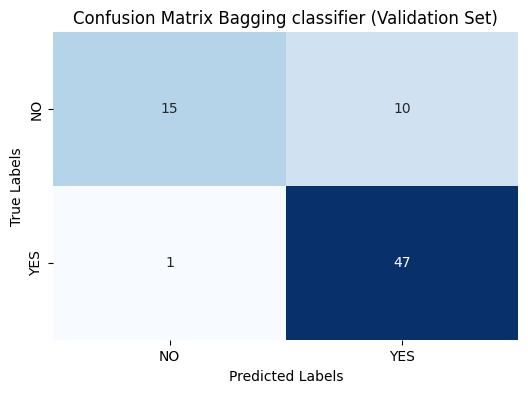

In [ ]:
y_pred_val = bag_clf.predict(X_val_scaled)
plot_confusion_matrix(y_true=Y_val, y_pred= y_pred_val, model_name="Bagging classifier", dataset_name="Validation")

**Inference from Final model**

1. Correctly Classified Yes of approved loan  = 47
2. Correctly Classified No to loans = 15
3. Precision = 88% and Recall = 78%
4. Accuracy achieved by bagging classifier model is 85%


#### **Confusion matrix on test set**

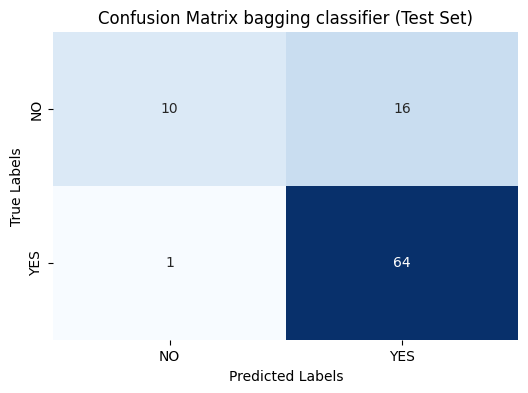

In [ ]:
y_pred_test = bag_clf.predict(X_test_scaled)
plot_confusion_matrix(y_true=y_test, y_pred= y_pred_test, model_name="bagging classifier", dataset_name="Test")

**Inference from Final model**

1. Correctly Classified Yes of approved loan  = 64
2. Correctly Classified No to loans = 10
3. Precision = 85% and Recall = 68%
4. Accuracy achieved by bagging classifier model is 81%


**Saving Final Model**

In [ ]:
import pickle
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(bag_clf, file)

### **Conclusion**

The Bagging Classifier demonstrated strong performance in classifying loan approval statuses, achieving an accuracy of 85% on the validation set and 81% on the test set. The model correctly classified 47 approved loans (Yes) and 15 denied loans (No) during validation, resulting in a precision of 88% and a recall of 78%. This indicates that while the model is highly accurate in identifying approved loans, it still has room for improvement in capturing all instances of loan approvals.

On the test set, the model classified 64 approved loans (Yes) and 10 denied loans (No), with precision at 85% and recall at 68%. These results highlight the model’s reliability in predicting loan approvals but also underscore the need to enhance recall to ensure that more actual approvals are identified.

Overall, the Bagging Classifier shows promise for the loan status approval classification problem, effectively balancing precision and accuracy. Future work could focus on increasing recall through enhanced feature engineering or by employing more sophisticated algorithms to further improve performance in detecting approved loans. Additionally, expanding the dataset could provide the model with more examples, potentially leading to better generalization and classification outcomes.